In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv("autompg_.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,NaN,165,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,NaN,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
399,27.0,4,140.0,86,2790.0,15.6,82.0,1,ford mustang gl
400,44.0,4,97.0,52,2130.0,24.6,82.0,2,vw pickup
401,32.0,4,135.0,84,2295.0,11.6,82.0,1,dodge rampage
402,28.0,4,120.0,79,2625.0,18.6,82.0,1,ford ranger


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           404 non-null    float64
 1   cylinders     404 non-null    int64  
 2   displacement  402 non-null    float64
 3   horsepower    402 non-null    object 
 4   weight        403 non-null    float64
 5   acceleration  404 non-null    float64
 6   model year    403 non-null    float64
 7   origin        404 non-null    int64  
 8   car name      404 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.5+ KB


## describe() function

It provides summary statistics for all numerical columns in the DataFrame.
It generates statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

From the above output, we can find out the standard deviation of displacement is abnormally high indicating the presence of outliers, this can be confirmed by plotting the displacement column with a histogram, boxplot or violin plot.

In [3]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,404.000000,404.000000,402.000000,403.000000,404.000000,403.000000,404.000000
mean,23.406683,5.475248,437.008706,2976.434243,15.517327,75.960298,1.569307
std,7.814917,1.711697,4496.272738,848.659081,2.785624,3.710736,0.801765
min,9.000000,3.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,101.750000,2227.000000,13.700000,73.000000,1.000000
50%,22.450000,4.000000,151.000000,2807.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,3616.500000,17.025000,79.000000,2.000000
max,46.600000,8.000000,90000.000000,5140.000000,24.800000,82.000000,3.000000


In [28]:
df.isna().sum()

mpg             0
cylinders       0
displacement    2
horsepower      2
weight          1
acceleration    0
model year      1
origin          0
car name        0
dtype: int64

In [29]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [30]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Histogram

A histogram is a type of bar chart that represents the distribution of a dataset. Histogram depicts the frequency of data points within specified ranges or intervals (bins).


Frequency Distribution:

X-Axis (Horizontal Axis): Represents the bins or intervals into which the data range is divided. These intervals are consecutive, non-overlapping, and of equal width.
Y-Axis (Vertical Axis): Represents the frequency or count of data points that fall within each bin.
Shape of the Distribution:

Symmetry: Whether the data distribution is symmetric or skewed.
Peaks: The presence of one or more peaks (modes) indicating common values or clusters within the data.
Tails: The spread of the data on either side of the central peak(s), showing how data points taper off.
Central Tendency:

The most common values (mode) are represented by the tallest bars in the histogram.
The approximate center of the data can often be inferred by observing where the histogram is centered.

Spread or Variability:
The range and spread of the data can be seen by the width of the distribution.
Wider distributions indicate more variability, while narrower distributions indicate less variability.


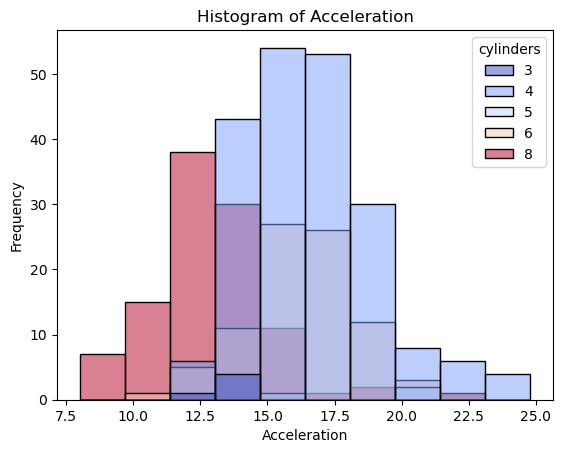

In [33]:
sns.histplot(data=df, x='acceleration', hue='cylinders', bins=10, palette = "coolwarm")
plt.xlabel("Acceleration")
plt.title('Histogram of Acceleration')
plt.ylabel('Frequency')
plt.show()

From the above histogram, we can infer that most of the data points belong to the interval 15.0 to 17.5. Additionally, the cars are 4-cylindered, and the plot indicates the absence of outliers

## Boxplot

A boxplot (also known as a box-and-whisker plot) provides a graphical representation of the distribution of a dataset. It displays the summary of a dataset in terms of its minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum, along with potential outliers. 

Text(0.5, 1.0, 'Boxplot for Weight')

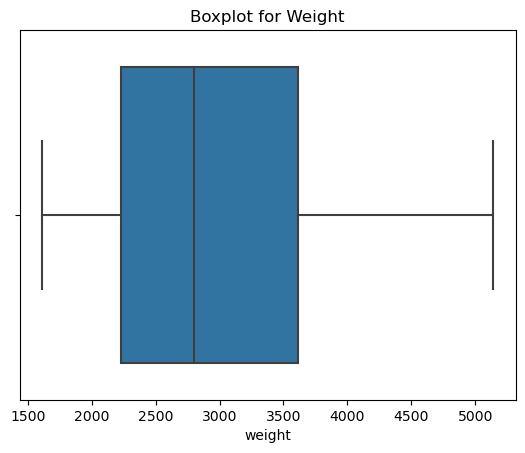

In [34]:
sns.boxplot(data = df, x="weight")
plt.title("Boxplot for Weight")

## Identifying outliers

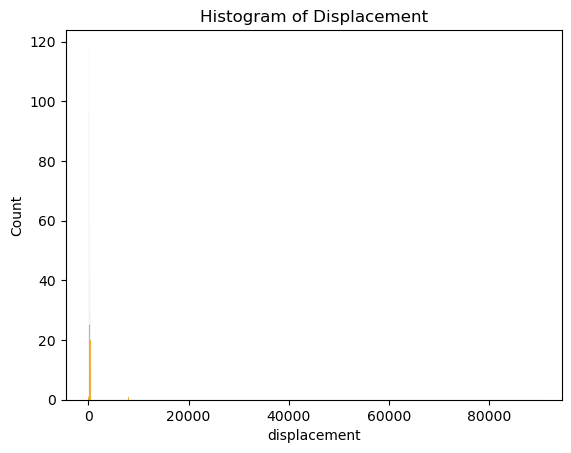

In [35]:
# Histogram with outliers
sns.histplot(df["displacement"], color="orange")
plt.title("Histogram of Displacement")
plt.show()


The above histogram indicates the presence of outliers, the same can be confirmed with a boxplot

Text(0.5, 1.0, 'Boxplot for displacement')

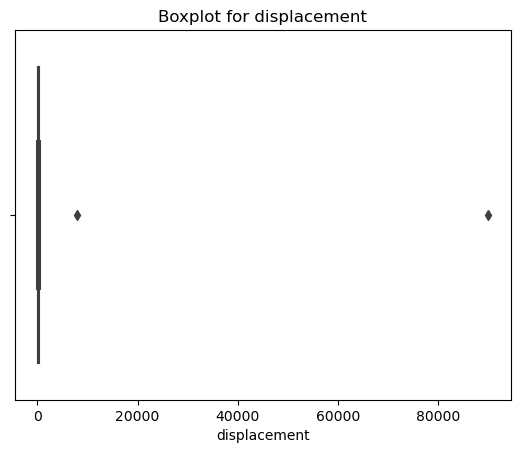

In [36]:
# Identifying outliers using boxplot
sns.boxplot(data = df, x="displacement")
plt.title("Boxplot for displacement")

The above boxplot reveals the presence of outliers
## Treating outliers

In [39]:
Q1 = df['displacement'].quantile(0.25)
Q3 = df['displacement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['displacement'] = df['displacement'].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else np.nan)
df.dropna(inplace=True)

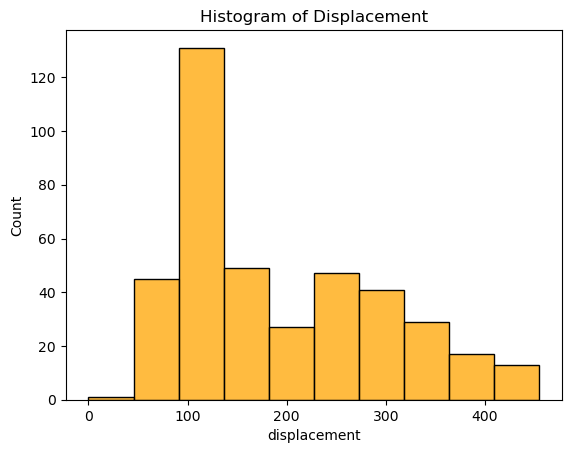

In [40]:
# Histogram without outliers
sns.histplot(df["displacement"], color="orange")
plt.title("Histogram of Displacement")
plt.show()


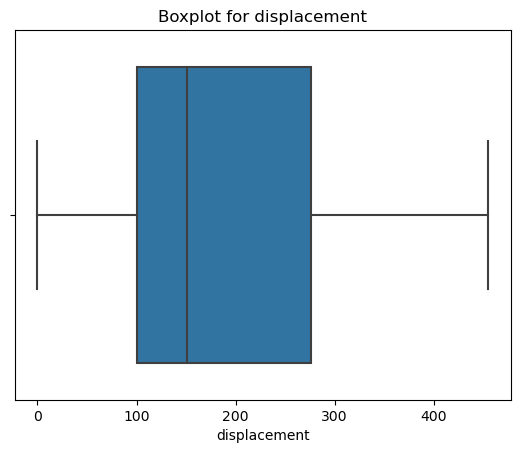

In [41]:
# Identifying outliers using boxplot
sns.boxplot(data = df, x="displacement")
plt.title("Boxplot for displacement")
plt.show()

The median (Q2) line within the box represents the midpoint of the acceleration data. In this boxplot, the median is around 150.
The box itself spans from the first quartile (Q1) to the third quartile (Q3). Here the Q1 is around 100 and Q3 is around 275.
The whiskers extend from the box to the smallest and largest values within 1.5 * IQR from Q1 and Q3, respectively.
The median line is slightly closer to Q1 than Q3, suggesting a slight right skew in the data. This means there are more cars with lower acceleration values and fewer cars with higher values.

## Kernal Density Plot (KDE Plot)

A kernel density plot (KDE plot) is a non-parametric way to estimate the probability density function of a continuous random variable. It's useful for visualizing the distribution of data points and identifying patterns.

 Unlike histograms, which aggregate data into bins, KDE provides a smooth estimate of the data distribution, making it a powerful tool for data analysis and visualization.

Text(0, 0.5, 'Density')

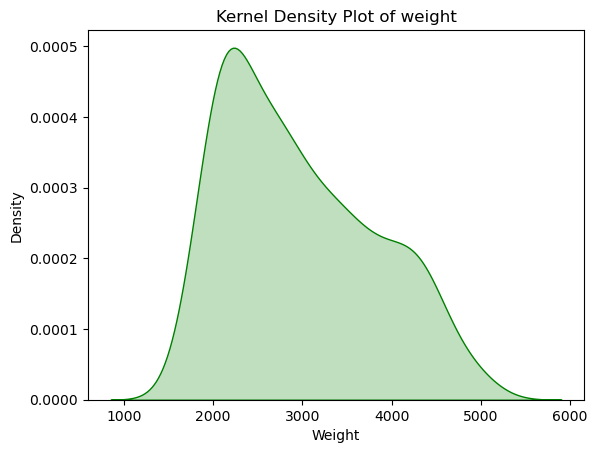

In [198]:
sns.kdeplot(x="weight",data = df, shade=True, color="green")
plt.title('Kernel Density Plot of weight')
plt.xlabel('Weight')
plt.ylabel('Density')

The above plot helps us understand that weight of cars in the dataset is distributed between the range of 1000 and 6000, with  The highest peak occurs around 2000 units of weight. This indicates that most of the data points are clustered around this value. The distribution is right-skewed, meaning that there are more values concentrated on the left side of the peak and a long tail extending towards the higher weight values.

## Violin Plot

A violin plot is a method of plotting numeric data and can be understood as a combination of a boxplot and a kernel density plot. It shows the distribution of the data across different values, which helps in understanding the data's distribution and density. It also helps in identifying outliers.

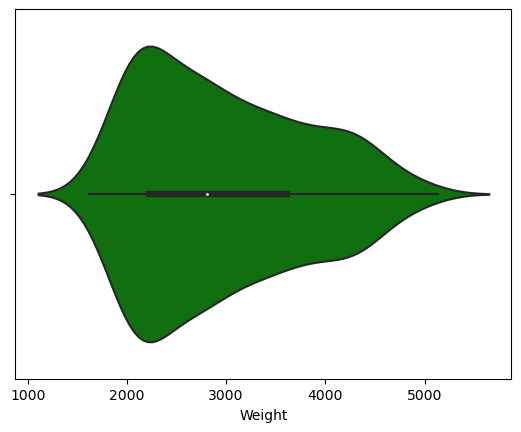

In [203]:
sns.violinplot(x="weight", data =df, color="green")
plt.xlabel("Weight")
plt.show()

Similar to the kernel density plot, the plot shows that the density is higher around the 2000-3000 range, indicating a larger concentration of weights in this region.
The white dot inside the plot represents the median of the data.

The thick black bar represents the interquartile range (IQR), which contains the middle 50% of the data. This shows that the central 50% of the weights lie between approximately 2000 and 4000 units.

The thin black lines extending from the bar represent the range of the data, excluding outliers. This suggests that the weights span from around 1000 to just over 5000 units.


## Scatterplot

Scatterplot
A scatterplot is a type of data visualization that displays values for typically two variables for a set of data. Each point on the scatterplot represents an individual data point.

Scatterplots are used to identify the relationship or correlation between two variables. Patterns or trends in the plot indicate the nature of the relationship (positive, negative, or no correlation).

Points that fall far away from the general pattern of the data may be outliers. Scatterplots make it easy to spot these anomalies.

<function matplotlib.pyplot.show(close=None, block=None)>

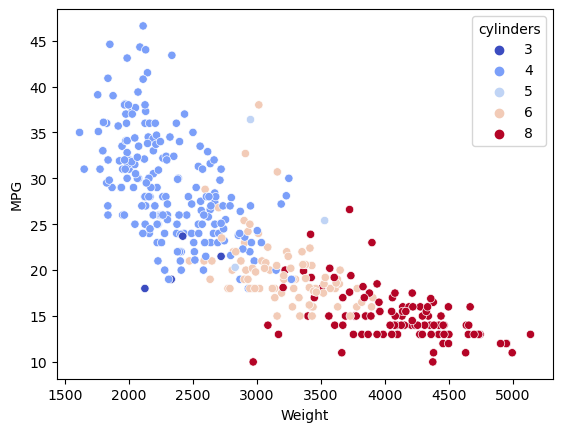

In [205]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='cylinders', palette='coolwarm')
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show

This scatterplot visualizes the relationship between the weight of cars (on the x-axis) and their miles per gallon (mpg) (on the y-axis) from the Auto MPG dataset. The points are colored based on the number of cylinders in the cars, with different colors representing different cylinder counts.

Negative Correlation:

There is a clear negative correlation between weight and mpg. As the weight of the cars increases, the mpg decreases. Heavier cars tend to be less fuel-efficient.

3 Cylinders (Dark Blue): These cars tend to be lighter and have higher mpg.
4 Cylinders (Light Blue): These cars are generally lighter and more fuel-efficient, clustered in the higher mpg range.
5 Cylinders (Light Orange): These cars are moderately distributed in terms of weight and mpg.
6 Cylinders (Light Red): These cars are somewhat heavier and have moderate mpg.
8 Cylinders (Dark Red): These cars are the heaviest and have the lowest mpg, indicating they are the least fuel-efficient.

## Countplot

A countplot is a type of bar plot that is used to display the frequency (count) of different categories of a categorical variable. It's particularly useful for visualizing the distribution of categorical data and comparing the frequency of different categories.

The x-axis represents the categories of the variable.

The y-axis represents the count of observations in each category.

Each bar represents the count of observations for a specific category.

The height of the bar indicates the frequency of that category.

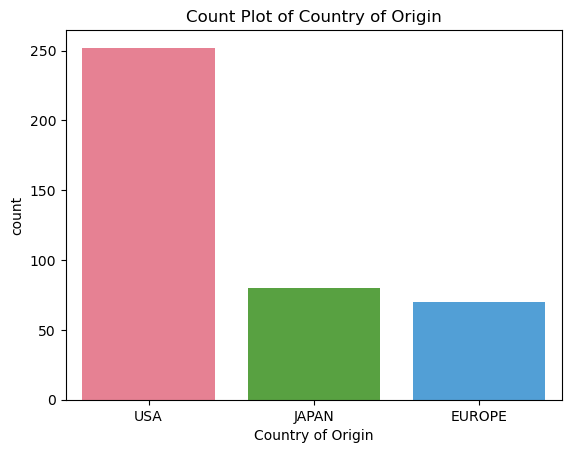

In [21]:
origin_mapping = {1:"USA", 2:"EUROPE", 3:"JAPAN"}
df["origin"] = df['origin'].replace(origin_mapping)

sns.countplot(x='origin', data=df, palette ="husl")
plt.xlabel("Country of Origin")
plt.title('Count Plot of Country of Origin')
plt.show()

The countplot provided shows the distribution of cars based on the number of cylinders they have.
The tallest bar corresponds to cars with 4 cylinders, indicating that this is the most common category, with over 200 cars.

The second tallest bar represents cars with 6 cylinders, showing a moderate number of cars in this category, around 100 cars.

The bar for cars with 8 cylinders is also prominent, with a significant count, but less than those with 4 cylinders.

The shortest bar indicates that cars with 3 cylinders are the least common, with very few cars in this category.


## Point plot

A point plot is a type of plot that shows point estimates and confidence intervals using scatter plot points. It is useful for comparing the central tendency (like the mean) of different categories and visualizing the variability or uncertainty around those estimates.


Point Estimates: Each point represents the central tendency (mean, median, etc.) of the data for each category.

Error Bars: The vertical lines (error bars) extending from the points indicate the variability or uncertainty around the point estimate, such as standard deviation or confidence intervals.



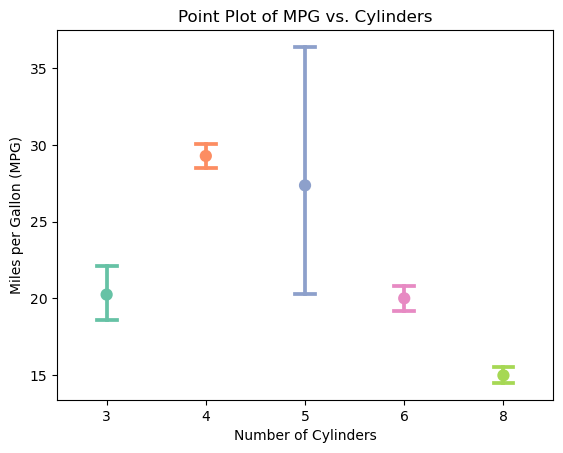

In [208]:
sns.pointplot(x='cylinders', y='mpg', data=df, capsize=0.2, palette='Set2')
plt.title('Point Plot of MPG vs. Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()

The plot shows the relationship between the number of cylinders in a vehicle and its miles per gallon (MPG) performance. 

There is a decreasing trend in MPG as the number of cylinders increases. Vehicles with more cylinders generally have lower fuel efficiency.

Error Bars: The plot includes error bars, which represent the variability or uncertainty in the MPG values for each number of cylinders.


Vehicles with 3 cylinders have an average MPG of around 20, with a relatively small error margin.
Vehicles with 4 cylinders have an average MPG of about 26, with a moderate error margin.
Vehicles with 5 cylinders show the highest variability, with MPG values ranging widely from about 15 to 35.
Vehicles with 6 cylinders have an average MPG of around 18, with a small error margin.
Vehicles with 8 cylinders have the lowest average MPG, around 15, with a very small error margin.
Outliers: The data for 5-cylinder vehicles show significant variability, suggesting either a smaller sample size or a more diverse set of vehicles in this category.

## Catplot

Catplot is used to show the relationship between one continuous variable and one categorical variable. The plot also shows the distribution of continuous variable.

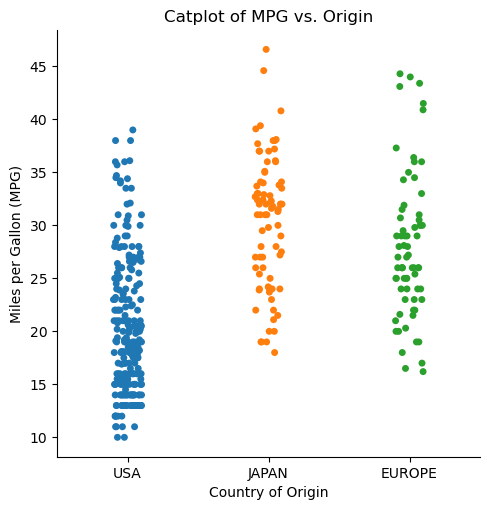

In [19]:

sns.catplot(x='origin', y='mpg', data=df)

# Add labels and title
plt.xlabel('Country of Origin')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Catplot of MPG vs. Origin')
plt.show()

From the plot we can infer that Japan produces the most fuel efficient vehicles, followed by Europe and USA produces the least fuel efficient vehicles.

In [42]:
df = pd.read_csv("autompg_cleaned.csv")
df.drop("Unnamed: 0", axis = 1, inplace=True)

## Heatmap

A heatmap is a data visualization technique that represents data values as colors in a matrix. It's especially useful for displaying the correlation between variables, the frequency of occurrences, or other metrics in a clear and interpretable way.

The data is structured in a matrix format, with rows and columns representing different categories, variables, or observations.
Each cell in the matrix contains a value that is represented by a color.

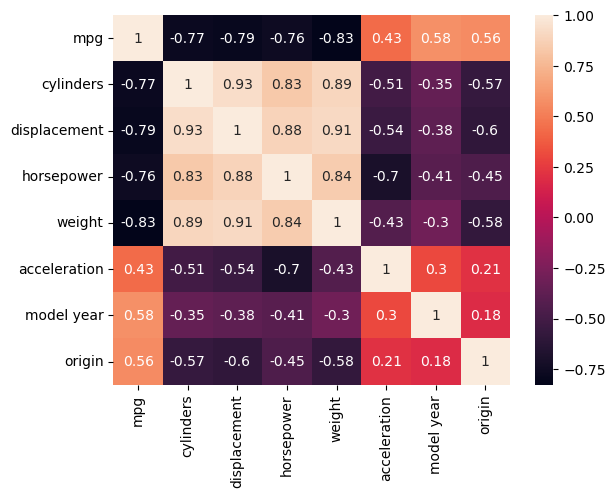

In [44]:
sns.heatmap(df.corr(), annot=True)
plt.show()

The above heatmap is a representation of a correlation heatmap where each cell represents the correlation coefficient between two variables.

From the heatmap, we can infer that mpg is negatively correlated with attributes such as cylinders, displacement, horsepower, weight and acceleration indicating that with increase in the said attribues will decrease fuel efficiency of the vehicle.

While the attribute cylinders are positively correlated with displacement, horsepower and weight indicating with increase in number of cylinders, the weight, displacement and horsepower of the vehicle increases

## Jointplot

A joint plot is a versatile and informative way to visualize the relationship between two variables, along with their individual distributions. It helps in understanding correlations, distributions, and patterns within the data.

It's a combination of a scatter plot (or other bivariate plot) and univariate histograms (or other univariate plots) for each variable.

In [61]:
origin_mapping = {1:"USA", 2:"EUROPE", 3:"JAPAN"}
df["origin"] = df['origin'].replace(origin_mapping)


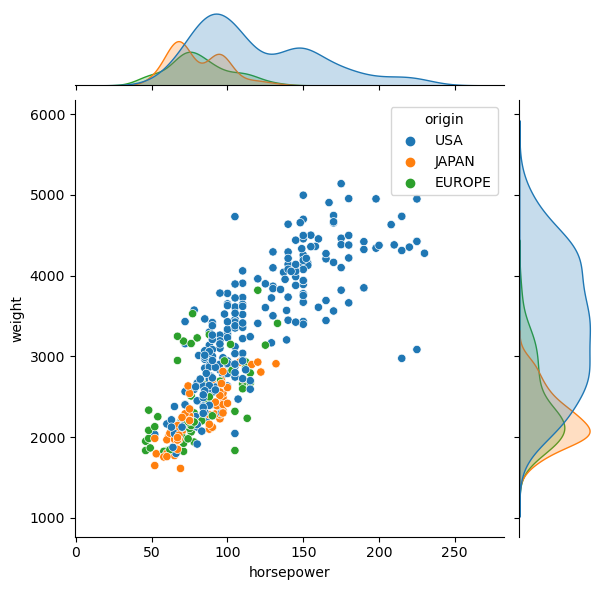

In [65]:
sns.jointplot(data = df, y="weight", x="horsepower", hue="origin")
plt.show()

Relationship Between Horsepower and Weight:

There is a positive correlation between horsepower and weight. As horsepower increases, weight tends to increase as well.
This indicates that heavier vehicles generally have more powerful engines.

Distribution by Origin:

USA

Vehicles from Origin 1 are distributed across a wide range of both horsepower and weight.
There are several vehicles with high horsepower and weight, suggesting that Origin 1 includes many powerful and heavy vehicles.

JAPAN

Vehicles from Origin 2 tend to have lower horsepower and weight compared to Origin 1.
The distribution is more concentrated in the lower ranges of both variables.

EUROPE
Vehicles from Origin 3 have the lowest range of horsepower and weight.
The distribution is tightly concentrated, indicating less variation in these attributes.